#### Introduction

This notebook shows how PCA can be applied to reduce dimensionality of a high dimensional dataset MNIST which is dataset of handwritten digits between 0 to 9 where each datapoint is 8x8 image of integer pixels in the range 0 to 16 & can be represented as a vector of 64 dimensions. sklearn MNIST have 5620 images. More details of MNIST can be found on this [link](https://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

In [5]:
#Loading MNIST dataset from sklearn datasets
digits = datasets.load_digits()
X = digits.data   #image
y = digits.target #label

In [6]:
#MNIST is a 64 dimensional dataset
X.shape

(1797, 64)

In [7]:
#Checking first image in dataset
images = digits.images
print(images[0],y[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 0


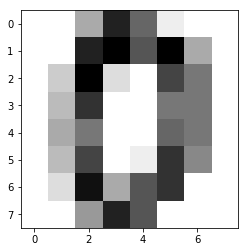

In [8]:
plt.imshow(images[0], cmap=plt.cm.gray_r, interpolation='nearest')

Text(0, 0.5, 'Cumulative explained variance')

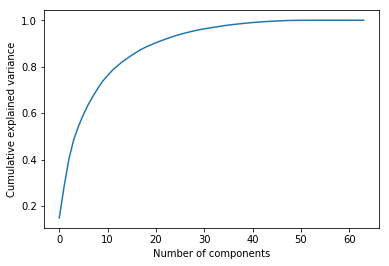

In [6]:
#Checking cumulative variance using PCA by applying PCA using all dimensions to observe change in variance with number of components
pca = PCA(64)
pca_full = pca.fit(X)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [7]:
#Reducing dimensions to 15 using PCA, as there is an elbow near 15 there is a small change in variance afterwards
pca = PCA(n_components=15)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
#Checking explained variance
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[179.0069301  163.71774688 141.78843909 101.10037518  69.51316554
  59.10852468  51.88453883  44.01510393  40.3109727   37.01177342
  28.51728724  27.32109276  21.89993007  21.31943451  17.62945505]
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661372 0.03353246 0.03078804 0.02372195 0.0227269
 0.01821734 0.01773446 0.01466497]
[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390622 0.70743869 0.73822673 0.76194868 0.78467558
 0.80289291 0.82062737 0.83529234]


So 83.5% of variance is retained after reducing dimensions from 64 to 15 using PCA with respective variance of each component shown above in second list above

In [9]:
#Reducing components further to 2 and visualize resulting principal components
pca = PCA(n_components=2)
pca = pca.fit_transform(X)
pca

array([[ -1.25946624,  21.27488646],
       [  7.95761043, -20.76869567],
       [  6.99192311,  -9.95599019],
       ...,
       [ 10.80128427,  -6.96025042],
       [ -4.87210231,  12.42395318],
       [ -0.34438831,   6.36554657]])

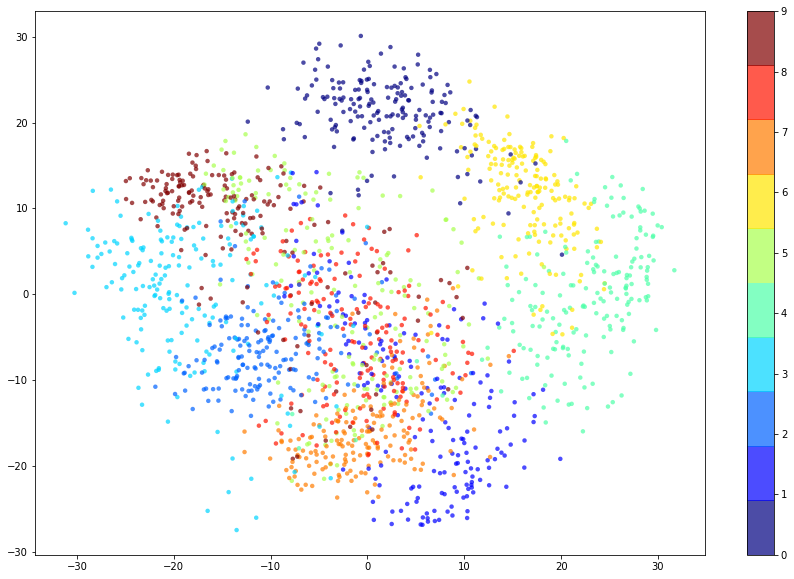

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(pca[:,0], pca[:,1], c=y, edgecolor='none', alpha=0.7,
           cmap=plt.get_cmap('jet', 10), s=20)
plt.colorbar()

In [11]:
#Visulaizing using 3 principal components now
pca = PCA(n_components=3)
pca = pca.fit_transform(X)

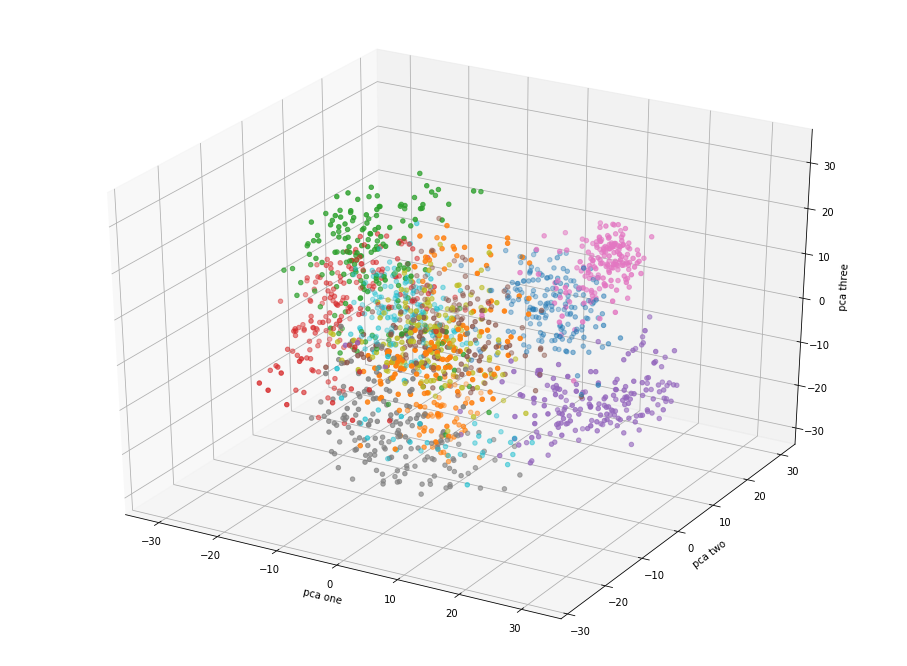

In [15]:
ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=pca[:,0], 
    ys=pca[:,1], 
    zs=pca[:,2], 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca one')
ax.set_ylabel('pca two')
ax.set_zlabel('pca three')
plt.show()